In [1]:
# Load libraries
import numpy as np
import pandas as pd

In [2]:
# read in the data
runs_df = pd.read_csv("../runs.csv")

In [3]:
# pandas info function to get data types, number of non-null entries
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

In [4]:
# Summary statistics of each feature
runs_df.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,46226.000000,10079.000000,1296.000000,79447.000000,79447.000000,75712.000000,79447.000000,79447.000000
mean,3173.352814,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,...,22.928985,23.864054,24.039662,24.105221,24.350216,85.322914,28.812977,7.423177,79.793007,85.832341
std,1833.101494,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,...,3.599727,3.571163,4.663367,1.127963,1.314755,18.512883,30.097375,8.823430,45.118874,54.338105
min,0.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,...,19.990000,21.000000,21.200000,21.420000,21.500000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,1586.000000,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,...,22.290000,23.230000,23.320000,23.410000,23.570000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,3174.000000,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,...,22.870000,23.760000,23.890000,23.960000,24.120000,83.350000,15.000000,4.100000,75.000000,76.000000
75%,4764.500000,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,...,23.520000,24.410000,24.560000,24.630000,24.820000,100.780000,38.000000,8.600000,118.000000,138.000000
max,6348.000000,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


In [5]:
# List percent of null entries per feature
runs_df.isna().sum() # missing values by column
runs_df.isna().sum().sum() # total missing values
runs_df.isna().sum() * 100 / len(runs_df) # percent missing values by column

race_id             0.000000
horse_no            0.000000
horse_id            0.000000
result              0.000000
won                 0.000000
lengths_behind      0.000000
horse_age           0.000000
horse_country       0.002517
horse_type          0.002517
horse_rating        0.000000
horse_gear          0.000000
declared_weight     0.000000
actual_weight       0.000000
draw                0.000000
position_sec1       0.000000
position_sec2       0.000000
position_sec3       0.000000
position_sec4      41.815298
position_sec5      87.313555
position_sec6      98.368724
behind_sec1         0.000000
behind_sec2         0.000000
behind_sec3         0.000000
behind_sec4        41.815298
behind_sec5        87.313555
behind_sec6        98.368724
time1               0.000000
time2               0.000000
time3               0.000000
time4              41.815298
time5              87.313555
time6              98.368724
finish_time         0.000000
win_odds            0.000000
place_odds    

In [6]:
# Drop features with > 40% null, they're not very useful
runs_clean_df = runs_df.drop(['position_sec4', 'position_sec5', 'position_sec6','behind_sec4', 'behind_sec5', 'behind_sec6','time4', 'time5', 'time6'], axis = 1)

In [7]:
# Drop the two entries with null in horse_country
runs_clean_df = runs_clean_df[runs_clean_df['horse_country'].notna()]

In [8]:
# Check current status
## There are still 3735 (~4%) entries with missing Odds
## This is probably an important feature so we don't want to delete
runs_clean_df.isna().sum()

race_id               0
horse_no              0
horse_id              0
result                0
won                   0
lengths_behind        0
horse_age             0
horse_country         0
horse_type            0
horse_rating          0
horse_gear            0
declared_weight       0
actual_weight         0
draw                  0
position_sec1         0
position_sec2         0
position_sec3         0
behind_sec1           0
behind_sec2           0
behind_sec3           0
time1                 0
time2                 0
time3                 0
finish_time           0
win_odds              0
place_odds         3735
trainer_id            0
jockey_id             0
dtype: int64

In [9]:
# Impute the place_odds with the mean value
## Explore a regression model with win_odds as explanatory variable
runs_clean_df['place_odds'].fillna(value=(runs_clean_df['place_odds'].mean()), inplace=True)

In [10]:
# Recheck missing values
## Non-Null is now 79445 for all features
runs_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 79446
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79445 non-null  int64  
 1   horse_no         79445 non-null  int64  
 2   horse_id         79445 non-null  int64  
 3   result           79445 non-null  int64  
 4   won              79445 non-null  float64
 5   lengths_behind   79445 non-null  float64
 6   horse_age        79445 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79445 non-null  int64  
 10  horse_gear       79445 non-null  object 
 11  declared_weight  79445 non-null  float64
 12  actual_weight    79445 non-null  int64  
 13  draw             79445 non-null  int64  
 14  position_sec1    79445 non-null  int64  
 15  position_sec2    79445 non-null  int64  
 16  position_sec3    79445 non-null  int64  
 17  behind_sec1 

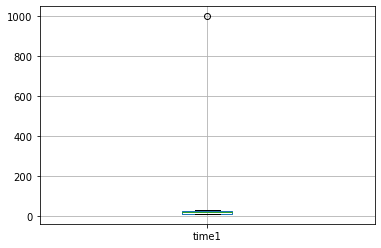

In [11]:
# Use boxplots to quickly looks for outliers
## Below all have what looks like placeholder 999 values that need to be filtered out
## behind_sec1, behind_sec3, time1, time2, time3
boxplot = runs_clean_df.boxplot(column=['time1'])

In [ ]:
# Look closer at outliers
runs_clean_df[['time1','time2','time3','behind_sec1','behind_sec3']].describe()

In [13]:
# Remove rows where a time value is equal to 999
## We're left with 79423 observations
runs_clean_df = runs_clean_df[runs_clean_df.time1 != 999]
runs_clean_df = runs_clean_df[runs_clean_df.time2 != 999]
runs_clean_df = runs_clean_df[runs_clean_df.time3 != 999]
runs_clean_df = runs_clean_df[runs_clean_df.behind_sec1 != 999]
runs_clean_df = runs_clean_df[runs_clean_df.behind_sec3 != 999]
# source: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [14]:
# Check for duplicates
## There are none
runs_clean_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
79442    False
79443    False
79444    False
79445    False
79446    False
Length: 79423, dtype: bool

In [15]:
# The data set is now clean and ready to be explored
runs_clean_df.to_csv("../runs_clean.csv")